In [64]:
import os
import sys
import pylab as pl
import numpy as np
import matplotlib.pyplot as plt

In [65]:
os.environ['CODE_ROOT'] = os.environ['HOME'] + '/DESI/'

sys.path.append(os.environ['CODE_ROOT'])

In [66]:
import pubplot

from   vmaxer        import vmaxer
from   astropy.table import Table
from   smith_kcorr   import test_plots, test_nonnative_plots
from   cosmo         import distmod
from   findfile      import findfile

In [67]:
dryrun  = False
version = 'GAMA4'
survey  = 'gama'

##  kE Catalog

In [68]:
fpath   = findfile(ftype='kE', version=version, dryrun=dryrun, survey=survey)
kE = Table.read(fpath)
kE

CATAID,OBJID,RA,DEC,R_PETRO,ZGAMA,NQ,SPECID,SURVEY_CLASS,UMAG_DRED_SDSS,GMAG_DRED_SDSS,RMAG_DRED_SDSS,IMAG_DRED_SDSS,ZMAG_DRED_SDSS,ZSURV,LUMDIST,DISTMOD,FIELD,IN_D8LUMFN,CARTESIAN_X,CARTESIAN_Y,CARTESIAN_Z,ROTCARTESIAN_X,ROTCARTESIAN_Y,ROTCARTESIAN_Z,GMR,DETMAG,REST_GMR_0P1,REST_GMR_0P1_WARN,REST_GMR_0P1_INDEX,KCORR_R0P1,KCORR_G0P1,KCORR_R0P0,KCORR_G0P0,REST_GMR_0P0,Q_COLOR_0P0,EQ_ALL_0P0,EQ_COLOR_0P0,MALL_0P0,MCOLOR_0P0,MQZERO_0P0,Z_THETA_QALL,Z_THETA_QZERO,Z_THETA_QCOLOR,DDPKCORR_R0P1,DDPKCORR_G0P1,DDPKCORR_R0P0,DDPKCORR_G0P0,DDPMALL_0P0
,,deg,deg,mag,,,,,mag,mag,mag,mag,mag,,Mpc,,,,,,,,,,mag,mag,,,,,,,,mag,mag,,,mag,mag,mag,,,,,,,,mag
int32,int64,float64,float64,float32,float32,int16,bytes33,int16,float32,float32,float32,float32,float32,float32,float64,float64,bytes3,int64,float64,float64,float64,float64,float64,float64,float32,float32,float64,int32,int64,float64,float64,float64,float64,float64,float64,float32,float32,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
49666,587722982295273988,221.89800269,-0.6415381,19.241835,0.12458,4,G15_Y1_HS2_033,6,19.763887,19.138214,18.93341,18.772236,19.113127,0.12458,409.8743148290063,38.06325351842394,G15,0,-271.2698035537147,-243.37940556486063,-4.080854256126575,273.30030998287657,241.09224426149586,-4.354889763758178,0.20480347,19.241835,0.1764508816620914,0,1,-0.11560051726479544,-0.08724793213001185,0.04724741726236183,0.051157136749574075,0.20089374730966275,2.12,-0.120842606,-0.26410958,-18.747823689354135,-18.604556713474466,-18.868666295183374,37.989658329857065,38.110500935686304,37.846391353977396,-0.08621053192172294,-0.04868873366801386,0.13051434644047816,0.21648655604564943,-18.83109061853225
139025,587724650333077845,185.31240015,-1.71745883,19.589233,0.07201,3,G12_Y2_005_095,5,20.732338,19.895437,19.584732,19.327354,19.398808,0.07201,228.23871532041073,36.7919465707857,G12,0,-211.89751863006472,-19.70339365082965,-6.381005589922235,212.0490405347563,17.922830436436097,-6.593626673755219,0.31070518,19.589233,0.33415436331369053,0,2,-0.10868117918692531,-0.1321303575636103,0.06394546216931761,0.04512917199872368,0.3295214751071174,2.12,-0.06984971,-0.1526612,-17.196808927331293,-17.11399743017944,-17.266658634517515,36.78604232576879,36.85589203295501,36.70323082861694,-0.12718171114218854,-0.1593859955398793,0.08954316722001257,0.10578929417378397,-17.222406632381986
214264,587725075524682122,129.50683691,0.52589209,18.379673,0.07826,4,G09_Y1_test_116,6,21.10666,19.103128,18.255648,17.893887,17.584246,0.07826,249.18607796654842,36.98261887309769,G9,0,-147.0128822160159,178.2975350217959,2.12113451328627,145.51211007838148,-179.52610400322502,1.9752331235584817,0.8474808,18.379673,0.8946003556432679,0,6,-0.13080627362114147,-0.17792585533862826,0.09635386685755401,0.19452459258337634,0.749310048199959,0.8,-0.0759122,-0.062607996,-18.6233875358904,-18.636691739639105,-18.699299735804857,37.00306054004079,37.07897273995525,37.016364743789495,-0.12145697371273845,-0.1475490985789903,0.09526790464946266,0.11762619113467299,-18.622301573682307
536269,588848898839543956,181.39347962,-0.85282612,17.191727,0.15774,5,322041491755132928,6,19.97562,18.241964,17.1869,16.784622,16.485594,0.15774,530.636077190221,38.62398386856322,G12,0,-458.15155993384866,-11.144813340761596,-6.821934742361414,458.2219394709942,7.296100659330028,-7.281389321955303,1.0550652,17.191727,0.9020483886914233,0,6,-0.03035639699275043,0.12266036934512314,0.19666854631768815,0.4978189925335285,0.7539147088134566,0.8,-0.1530078,-0.126192,-21.475917924963156,-21.502733726822058,-21.6289257303106,38.66764460953347,38.82065241488091,38.69446041139237,-0.06663102658365333,0.03237745329091335,0.15009385177854778,0.2975527430045766,-21.429343230424013
418998,587728879259680951,138.42527661,2.73289256,19.210749,0.15464,4,G09_Y2_031_298,6,21.882418,20.103489,19.081709,18.549156,18.176828,0.15464,519.1491953902114,38.57646092626833,G9,0,-335.97407304578536,298.02679081242127,21

In [69]:
def color_plot(ctype, xlabel=None, max_col=1.0):
    colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
    idx    = np.digitize(kE['MCOLOR_0P0'], np.arange(-23., -17., 1.))

    if xlabel == None:
        xlabel = ctype
    
    for count, jj in enumerate(np.unique(idx)):
        sample  = kE[(idx == jj) & (kE['MCOLOR_0P0'].data >= -23.) & (kE['MCOLOR_0P0'].data <= -17.)]
        nsample = len(sample)

        if nsample == 0:
            continue
    
        dbin = 0.05
        bins = np.arange(-0.5, max_col, dbin)
    
        ns, _ = np.histogram(sample[ctype], bins=bins)
    
        centres = bins[:-1] + dbin/2.
    
        plt.plot(centres, ns / nsample, lw=2, color=colors[count], label=r'{:.0f} $\leq M_r \leq$ {:.0f}'.format(sample['MCOLOR_0P0'].min(),\
                                                                                                                 sample['MCOLOR_0P0'].max()))

    plt.axvline(0.63, c='black', lw=0.5)

    plt.xlabel(xlabel)
    plt.ylabel(r'$p$({})'.format(ctype), fontsize=14)
    
    plt.xlim(-0.1, max_col)
    
    plt.legend(frameon=False)

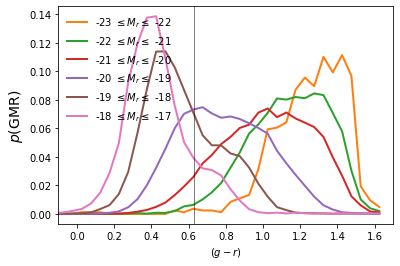

In [70]:
color_plot('GMR', '$(g-r)$', max_col=1.7)

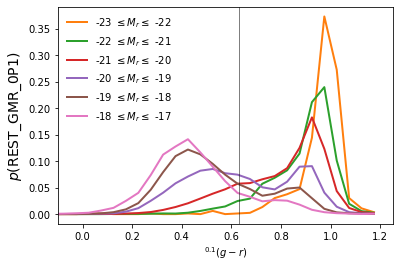

In [71]:
color_plot('REST_GMR_0P1', '$^{0.1}(g-r)$', max_col=1.25)

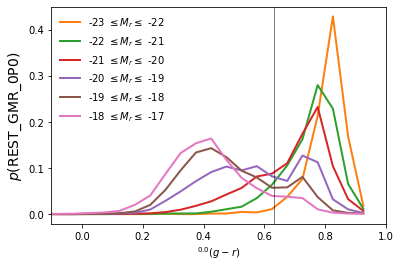

In [72]:
color_plot('REST_GMR_0P0', '$^{0.0}(g-r)$')

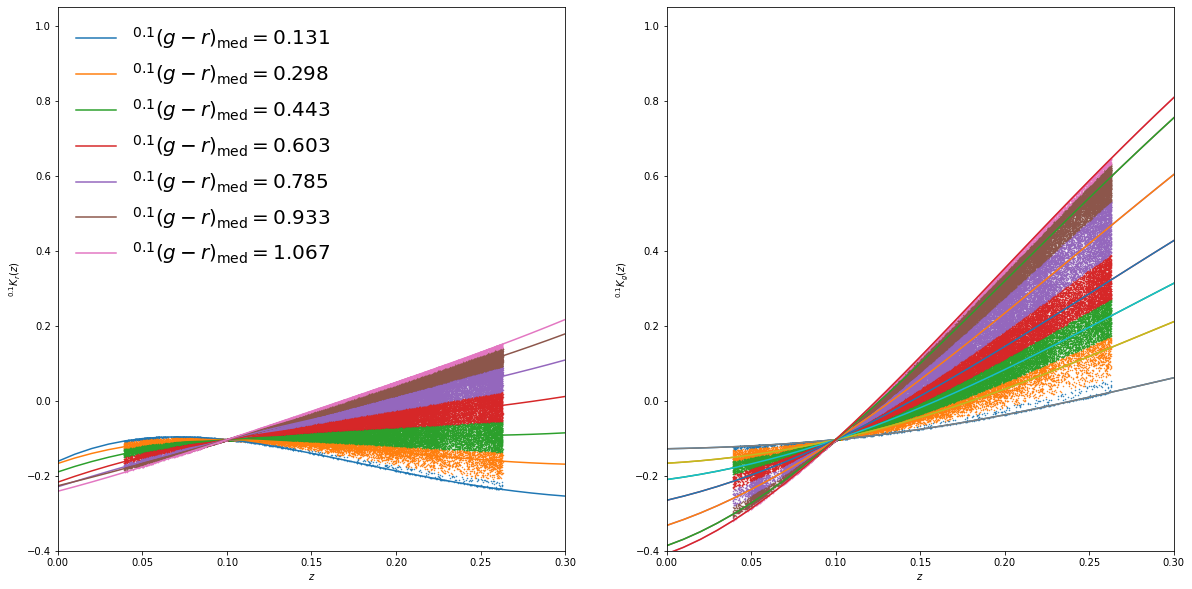

In [74]:
fig, axes = plt.subplots(1, 2, figsize=(20,10))

test_plots(axes)

for idx in np.unique(kE['REST_GMR_0P1_INDEX']):
    isin = kE['REST_GMR_0P1_INDEX'] == idx
      
    n_in = np.count_nonzero(isin)
        
    axes[0].scatter(kE['ZSURV'][isin], kE['KCORR_R0P1'][isin], s=0.25)
    axes[1].scatter(kE['ZSURV'][isin], kE['KCORR_G0P1'][isin], s=0.25)
    
    axes[0].set_xlim(0, 0.3)
    axes[1].set_xlim(0, 0.3)

    axes[0].set_ylim(-0.4, 1.05)
    axes[1].set_ylim(-0.4, 1.05)
    
axes[0].legend(ncol=1, frameon=False, loc=2, fontsize=20)
axes[1].get_legend().remove()

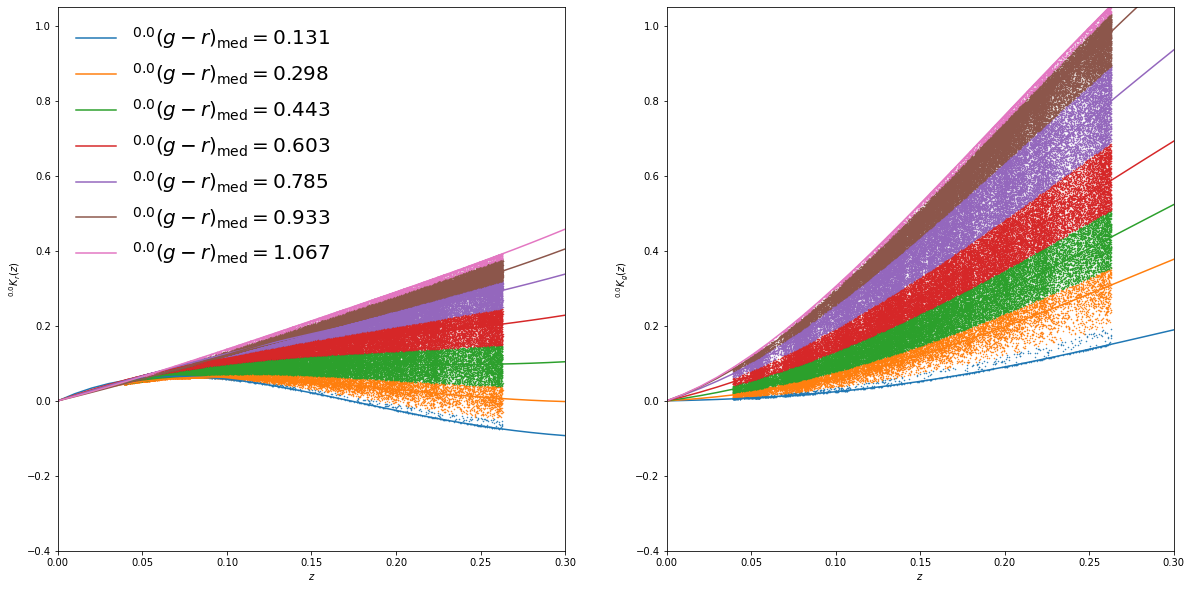

In [76]:
fig, axes = plt.subplots(1, 2, figsize=(20,10))

test_nonnative_plots(axes, 0.0)

for idx in np.unique(kE['REST_GMR_0P1_INDEX']):
    isin = kE['REST_GMR_0P1_INDEX'] == idx
        
    axes[0].scatter(kE['ZSURV'][isin], kE['KCORR_R0P0'][isin], s=0.25)
    axes[1].scatter(kE['ZSURV'][isin], kE['KCORR_G0P0'][isin], s=0.25)
    
    axes[0].set_xlim(0, 0.3)
    axes[1].set_xlim(0, 0.3)

    axes[0].set_ylim(-0.4, 1.05)
    axes[1].set_ylim(-0.4, 1.05)
    
axes[0].legend(ncol=1, frameon=False, loc=2, fontsize=20)

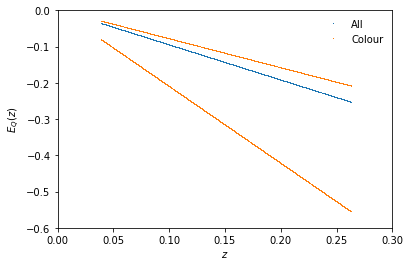

In [77]:
pl.plot(kE['ZSURV'], kE['EQ_ALL_0P0'], marker=',', lw=0.0, label='All')
pl.plot(kE['ZSURV'], kE['EQ_COLOR_0P0'], marker=',', lw=0.0, label='Colour')

pl.xlabel(r'$z$')
pl.ylabel(r'$E_Q(z)$')

pl.xlim(0.0,0.3)
pl.ylim(-0.6, 0.0)

pl.legend(frameon=False)

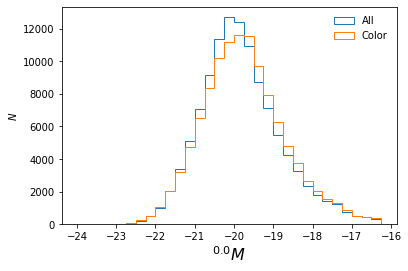

In [78]:
_ = pl.hist(kE['MALL_0P0'], histtype='step', bins=np.arange(-24., -16.0, 0.25), label='All')
_ = pl.hist(kE['MCOLOR_0P0'], histtype='step', bins=np.arange(-24., -16.0, 0.25), label='Color')

pl.xlabel(r'$^{0.0}M$', fontsize=16)
pl.ylabel('$N$')

pl.legend(frameon=False)

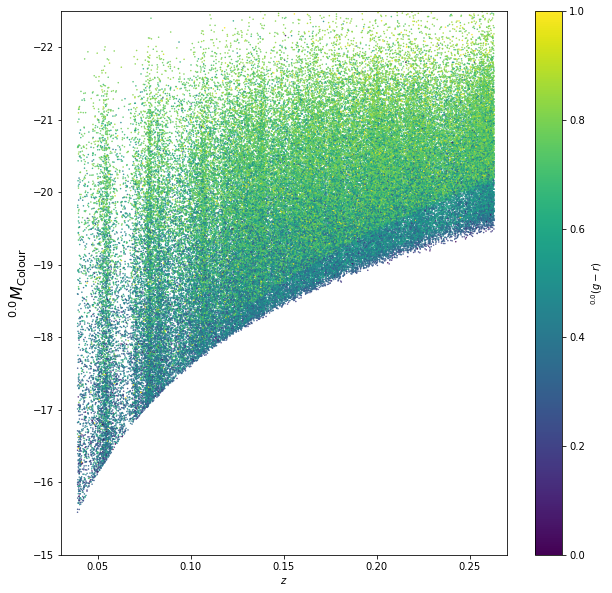

In [79]:
fig, ax = plt.subplots(1,1,figsize=(10,10))

pl.sca(ax)

plt.scatter(kE['ZSURV'], kE['MCOLOR_0P0'], c=kE['REST_GMR_0P0'], s=0.25, vmin=0.0, vmax=1.0)
plt.xlabel(r'$z$')
plt.ylabel(r'$^{0.0}M_{\rm Colour}$', fontsize=16)

plt.xlim(0.03, 0.27)
plt.ylim(-15., -22.5)

plt.colorbar(label = r'$^{0.0}(g-r)$')

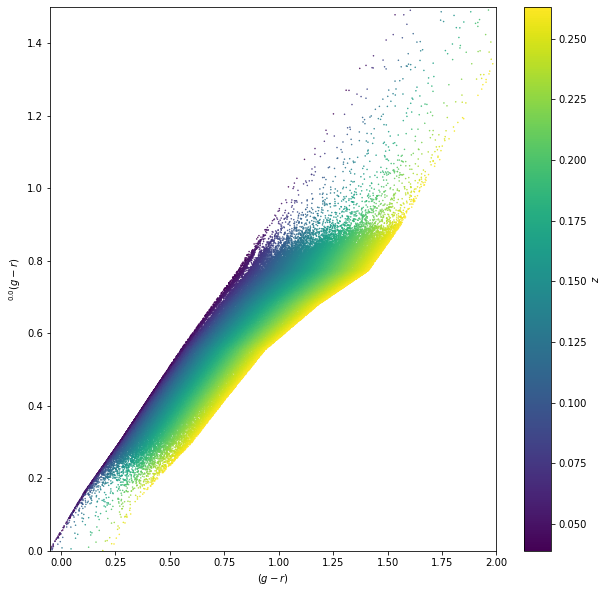

In [81]:
fig, ax = plt.subplots(1,1,figsize=(10,10))
pl.sca(ax)

plt.scatter(kE['GMR'], kE['REST_GMR_0P0'], c=kE['ZSURV'], s=0.25)
plt.xlabel(r'$(g-r)$')
plt.ylabel(r'$^{0.0}(g-r)$')
plt.xlim(-0.05, 2.0)
plt.ylim( 0.0, 1.5)
plt.colorbar(label='$z$')

# Done.